# Loading the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
analysis=pd.read_csv(r"C:\Users\udayk\OneDrive\Desktop\mlflow_sentiment_analysis\reviews_badminton_data.csv")

In [3]:
analysis.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb-21,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb-21,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr-21,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr-16,Over pricedJust â?¹620 ..from retailer.I didn'...,1


In [4]:
print(analysis.shape)

(8518, 8)


In [5]:
analysis['Ratings'] = np.where((analysis['Ratings'] < 3), 0, analysis['Ratings'])
analysis['Ratings'] = np.where((analysis['Ratings'] >= 3), 1, analysis['Ratings'])

In [6]:
analysis.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb-21,"Nice product, good quality, but price is now r...",1
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb-21,They didn't supplied Yonex Mavis 350. Outside ...,0
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr-21,Worst product. Damaged shuttlecocks packed in ...,0
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",1
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr-16,Over pricedJust â?¹620 ..from retailer.I didn'...,0


In [7]:
numeric_columns = ['Up Votes', 'Down Votes']

In [8]:
median_values_subset = analysis[numeric_columns].median()

In [9]:
analysis[numeric_columns] = analysis[numeric_columns].fillna(median_values_subset)

In [10]:
columns_to_drop = ['Month', 'Place of Review', 'Reviewer Name']
analysis.drop(columns=columns_to_drop, inplace=True)


In [11]:
analysis.dropna(inplace=True)

In [12]:
from sklearn.model_selection import train_test_split

#assuming 'analysis' is your DataFrame containing the reviews data
x=analysis[['Review text']]
y=analysis[['Ratings']]

#split the data into training and testing data

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

#print the shape of the training and testing data

print("X_train shaoe:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

X_train shaoe: (6806, 1)
X_test shape: (1702, 1)
y_train shape: (6806, 1)
y_test shape: (1702, 1)


In [13]:
import re

# Function to find emojis in text
def find_emojis(text):
    # Define regex pattern to match emojis
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    return emoji_pattern.findall(text)

# Apply the function to find emojis in each review text
analysis['Emojis'] = analysis['Review text'].apply(find_emojis)

# Display reviews containing emojis
reviews_with_emojis = analysis[analysis['Emojis'].apply(len) > 0]
print("Reviews containing emojis:")
print(reviews_with_emojis[['Review text', 'Emojis']])

Reviews containing emojis:
                                            Review text        Emojis
14    really satisfied with the quality and the prom...           [👍]
55                       Low quality very bad quality 😡           [😡]
69                                   Very bad quality 👎           [👎]
88                                          it's awsm 😎           [😎]
103   This shuttle is the best one, it is excellent ...           [👍]
...                                                 ...           ...
8045                            Met the expectations 👌👌          [👌👌]
8117                                   Good quality...👌           [👌]
8138                        very bad quality 👎👎👎👎👎👎👎👎👎👎  [👎👎👎👎👎👎👎👎👎👎]
8234                        Best quality at best price👌           [👌]
8313                    Superb quality as aspected... 👍           [👍]

[249 rows x 2 columns]


In [14]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\udayk\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\udayk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\udayk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [15]:
# The inflect library and demonstrate its usage for pluralizing words.

!pip3 install inflect
import inflect
p=inflect.engine()
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string

In [16]:
analysis['Review text'] = analysis['Review text'].str.replace("n't", " not")

In [17]:
# Initialize WordNet Lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_review(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove emojis from the text
    text = re.sub(r'[^\x00-\x7F]+', '', text)

    # Remove emails from the text
    text = re.sub(r'\S*@\S*\s?', '', text)

    # Remove digits from the text
    text = re.sub(r'\d+', '', text)

    # Remove all alphanumeric characters
    text = re.sub(r'\W', ' ', text)

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    # Tokenize text
    tokens = word_tokenize(text)

    # Remove 'read' with or without spaces
    new_tokens = [token for token in tokens if token.lower()]

    # Handle 'not' and the following token together
    final_tokens = []
    i = 0
    while i < len(new_tokens):
        if new_tokens[i] == 'not' and i < len(new_tokens) - 1:
            final_tokens.append(f'not {new_tokens[i + 1]}')
            i += 1  # Skip the next token
        else:
            final_tokens.append(new_tokens[i])
        i += 1

    # Lemmatize tokens
    lemmatized_tokens = [lemmatizer.lemmatize(token, pos='v') for token in final_tokens if token.lower() not in stop_words]

    # Join the lemmatized tokens back into a single string
    cleaned_text = ' '.join(lemmatized_tokens)

    return cleaned_text

# Apply the preprocess_review function to each row of the DataFrame
# X_train['Cleaned Review Title'] = X_train['Review Title'].apply(preprocess_review)
X_train['Cleaned Review Text'] = X_train['Review text'].apply(preprocess_review)

X_train.head()


,Review text,Cleaned Review Text
1372,Very good.,good
3846,Have been purchasing the shuttles from Flipkar...,purchase shuttle flipkart long time quality sh...
333,Nice product. .,nice product
1259,Worst on recent times.We played new Ball today...,worst recent time play new ball today two ball...
3532,Better,better


In [18]:
print(analysis.isnull().sum())

Review Title    0
Up Votes        0
Down Votes      0
Review text     0
Ratings         0
Emojis          0
dtype: int64


In [19]:
X_train.columns

Index(['Review text', 'Cleaned Review Text'], dtype='object')

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer object
vectorizer_bow = CountVectorizer()

# Fit-transform the 'Review text' columns
X_train_bow_text = vectorizer_bow.fit_transform(X_train['Cleaned Review Text'])

In [21]:
X_train_bow_text

<6806x2054 sparse matrix of type '<class 'numpy.int64'>'
	with 22715 stored elements in Compressed Sparse Row format>

In [22]:
print("Total unique words:", len(vectorizer_bow.vocabulary_))

print("Type of train features:", type(X_train_bow_text))

print("Shape of input data:", X_train_bow_text.shape)

Total unique words: 2054
Type of train features: <class 'scipy.sparse._csr.csr_matrix'>
Shape of input data: (6806, 2054)


In [23]:
X_train_bow_text_array = X_train_bow_text.toarray()

In [24]:
print(X_train_bow_text_array)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer object
vectorizer_tfidf = TfidfVectorizer()

# Fit-transform the 'Review Title' and 'Review text' columns

X_train_tfidf_text = vectorizer_tfidf.fit_transform(X_train['Cleaned Review Text'])

In [26]:
X_train_tfidf_text_array = X_train_tfidf_text.toarray()

In [27]:
print(X_train_tfidf_text_array)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [28]:
# Apply the preprocess_review function to each row of the DataFrame

X_test['Cleaned Review Text'] = X_test['Review text'].apply(preprocess_review)

X_test.head()

,Review text,Cleaned Review Text
4392,Not good,not good
8422,Good product in right app......,good product right app
2138,Very good quality,good quality
3538,Good,good
2684,Thanks,thank


In [29]:
# Bag-of-Words (BoW)
bow_vectorizer = CountVectorizer(max_features=1000, min_df=5, max_df=0.7)

# Fit the CountVectorizer with the training data
X_train_bow_text = bow_vectorizer.fit_transform(X_train['Cleaned Review Text'])

# Transform the test data using the fitted CountVectorizer
X_test_bow_text = bow_vectorizer.transform(X_test['Cleaned Review Text'])

In [30]:
X_test_bow_text

<1702x442 sparse matrix of type '<class 'numpy.int64'>'
	with 5051 stored elements in Compressed Sparse Row format>

In [31]:
print("Total unique words:", len(vectorizer_bow.vocabulary_))

Total unique words: 2054


In [32]:
print("Total unique words:", len(vectorizer_bow.vocabulary_))

print("Type of test features:", type(X_test_bow_text))

print("Shape of input data:", X_test_bow_text.shape)

Total unique words: 2054
Type of test features: <class 'scipy.sparse._csr.csr_matrix'>
Shape of input data: (1702, 442)


In [33]:
X_test_bow_text_array = X_test_bow_text.toarray()

In [34]:
print(X_test_bow_text_array)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [35]:
# transform the 'Review text' columns

X_test_tfidf_text = vectorizer_tfidf.transform(X_test['Cleaned Review Text'])

In [36]:
X_test_tfidf_text_array = X_test_tfidf_text.toarray()

In [37]:
print(X_test_tfidf_text_array)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [38]:
X_test.head()

,Review text,Cleaned Review Text
4392,Not good,not good
8422,Good product in right app......,good product right app
2138,Very good quality,good quality
3538,Good,good
2684,Thanks,thank


In [39]:
X_test.shape

(1702, 2)

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

In [41]:
import warnings
warnings.filterwarnings('ignore')

# Auto Logging ALL Experiment Run using MLFlow

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Define pipelines for each classifier
pipelines = {
    'knn': Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('classifier', KNeighborsClassifier())
    ]),
    'svc': Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('classifier', SVC())
    ]),
    'logistic_regression': Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('classifier', LogisticRegression())
    ]),
    'random_forest': Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('classifier', RandomForestClassifier())
    ]),
    'decision_tree': Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('classifier', DecisionTreeClassifier())
    ])
}

# Define parameter grid for each algorithm
param_grids = {
    'knn': {
        'tfidf__max_features': [1000, 2000, 3000],
        'classifier__n_neighbors': [3, 5, 7],
        'classifier__p': [1, 2, 3]
    },
    'svc': {
        'tfidf__max_features': [1000, 2000, 3000],
        'classifier__kernel': ['rbf', 'poly', 'linear'],
        'classifier__C': [0.1, 0.01, 1, 10, 100],
        'classifier__degree': [2, 3, 4, 5]
    },
    'logistic_regression': {
        'tfidf__max_features': [1000, 2000, 3000],
        'classifier__C': [0.1, 1, 10],
        'classifier__penalty': ['l2', 'l1', 'elasticnet'],
        'classifier__l1_ratio': [0.4, 0.5, 0.6],
        'classifier__solver': ['liblinear', 'saga']
    },
    'random_forest': {
        'tfidf__max_features': [1000, 2000, 3000],
        'classifier__n_estimators': [50, 100, 200]
    },
    'decision_tree': {
        'tfidf__max_features': [1000, 2000, 3000],
        'classifier__max_depth': [None, 5, 10]
    }
}



In [43]:
best_models = {}

# Run the Pipeline
for algo in pipelines.keys():
    print("*"*10, algo, "*"*10)
    grid_search = GridSearchCV(estimator=pipelines[algo],
                               param_grid=param_grids[algo],
                               cv=5,
                               scoring='accuracy',
                               return_train_score=True,
                               verbose=1
                              )

    # Fit the model
    %time grid_search.fit(X_train['Cleaned Review Text'], y_train)

    # Print train and test scores
    print('Train Score:', grid_search.best_score_)
    print('Test Score:', grid_search.score(X_test['Cleaned Review Text'], y_test))

    best_models[algo] = grid_search.best_estimator_
    print()


********** knn **********
Fitting 5 folds for each of 27 candidates, totalling 135 fits
CPU times: total: 4min 29s
Wall time: 1min 48s
Train Score: 0.9150761565360186
Test Score: 0.9048178613396005

********** svc **********
Fitting 5 folds for each of 180 candidates, totalling 900 fits
CPU times: total: 17min 31s
Wall time: 29min 54s
Train Score: 0.933147756734974
Test Score: 0.9336075205640423

********** logistic_regression **********
Fitting 5 folds for each of 162 candidates, totalling 810 fits
CPU times: total: 3min 7s
Wall time: 5min 4s
Train Score: 0.928151214717519
Test Score: 0.9224441833137486

********** random_forest **********
Fitting 5 folds for each of 9 candidates, totalling 45 fits
CPU times: total: 2min 19s
Wall time: 4min 57s
Train Score: 0.9321191013345331
Test Score: 0.9300822561692127

********** decision_tree **********
Fitting 5 folds for each of 9 candidates, totalling 45 fits
CPU times: total: 6.95 s
Wall time: 15.7 s
Train Score: 0.9219813322889255
Test Scor

In [44]:
!pip install mlflow

In [45]:
import mlflow
mlflow.set_experiment("sentiment_review_analysis_prediction")

<Experiment: artifact_location='file:///C:/Users/udayk/OneDrive/Desktop/mlflow_sentiment_analysis/mlruns/594748721105587511', creation_time=1711176234275, experiment_id='594748721105587511', last_update_time=1711176234275, lifecycle_stage='active', name='sentiment_review_analysis_prediction', tags={'mlflow.sharedViewState.3a18b292cd97e2e5fb8d35ffc6c166c4ce77f70b01142e304d2ae83859c89b13': '{"searchFilter":"","orderByKey":"attributes.start_time","orderByAsc":false,"startTime":"ALL","lifecycleFilter":"Active","datasetsFilter":[],"modelVersionFilter":"All '
                                                                                            'Runs","selectedColumns":["attributes.`Source`","attributes.`Models`","attributes.`Dataset`","metrics.`test_accuracy`","metrics.`train_accuracy`","metrics.`best_cv_score`","metrics.`mean_fit_time`"],"runsPinned":[],"runsHidden":[],"runsHiddenMode":"FIRST_10_RUNS","compareRunCharts":[{"uuid":"1711192819596oogl7lmp","type":"BAR","runsCountToCompare

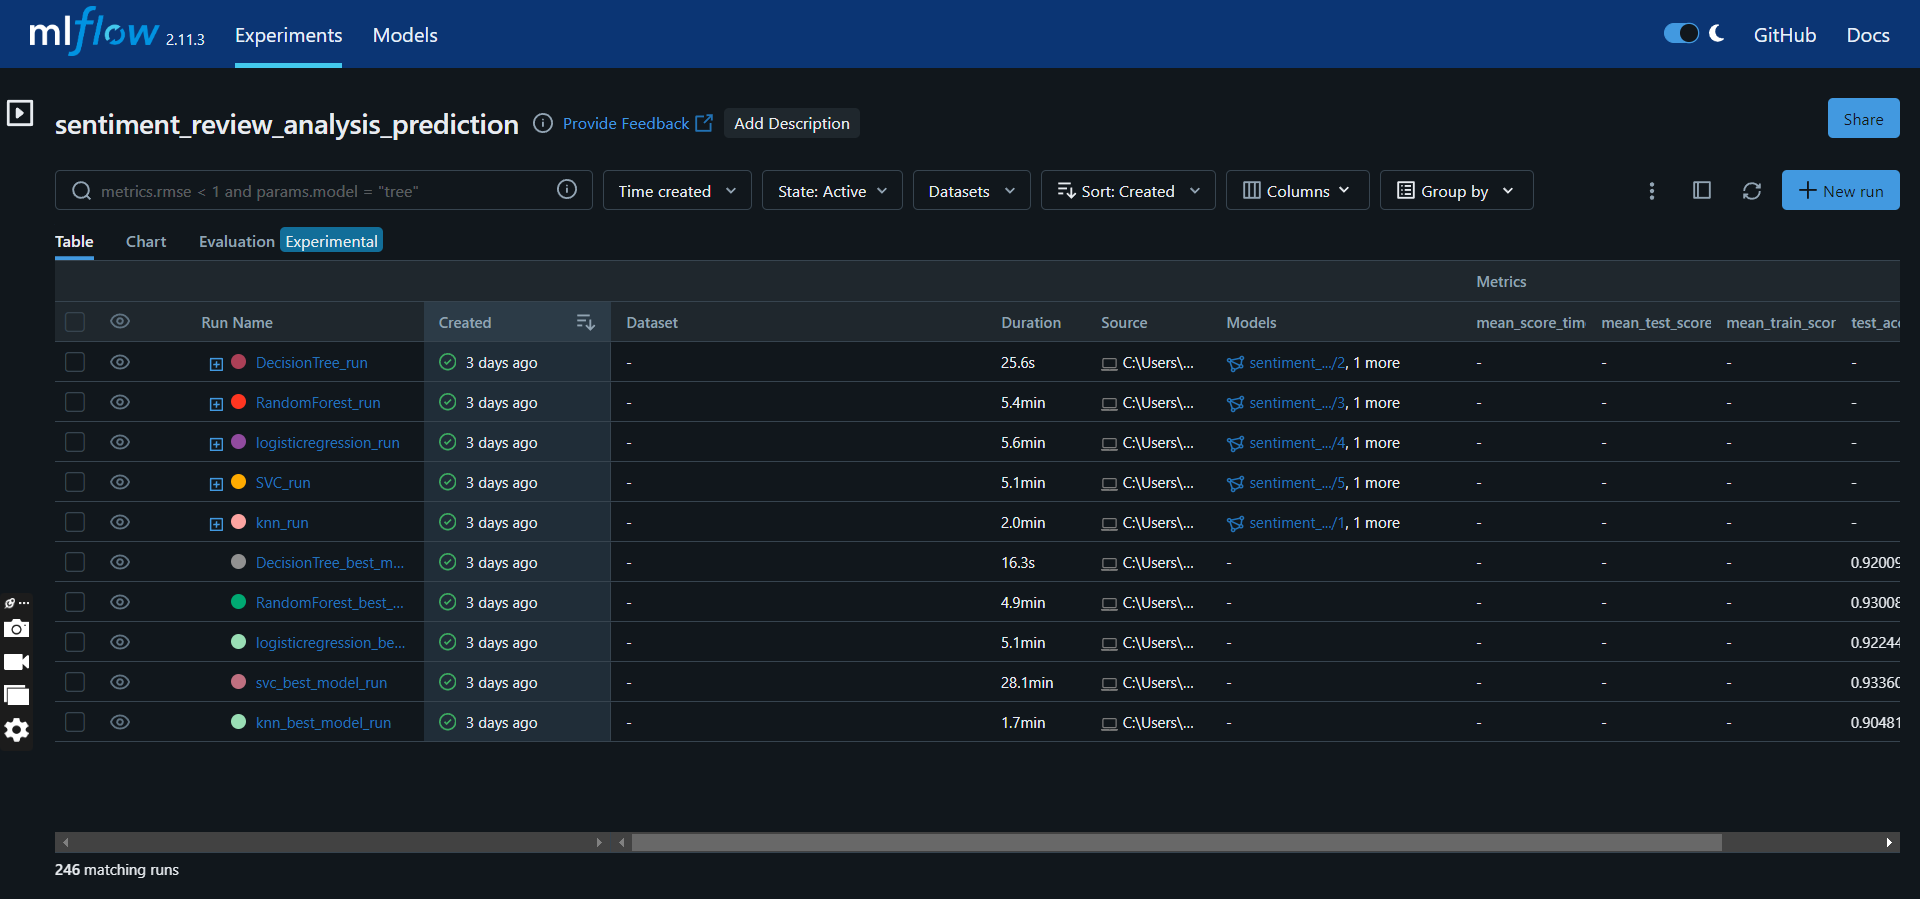

In [1]:
from IPython.display import Image
Image(filename='Screenshot (287).png')

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
import mlflow

# Define pipeline steps
pipe_1 = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('classifier', KNeighborsClassifier())
])

# Define the parameter grid
parameter_grid_1 = [
    {
        'tfidf__max_features': [1000, 2000, 3000],
        'classifier__n_neighbors': [3, 5, 7],
        'classifier__p': [1, 2, 3]
    }
]

# Initialize GridSearchCV
clf = GridSearchCV(
    estimator=pipe_1,
    param_grid=parameter_grid_1,
    scoring='accuracy',
    cv=5,
    return_train_score=True,
    verbose=1
)

# Initialize the auto logger
# max_tuning_runs=None will make sure that all the runs are recorded.
# By default top 5 runs will be recorded for each experiment
mlflow.sklearn.autolog(max_tuning_runs=None)

# Start MLflow run
with mlflow.start_run() as run:
    %time clf.fit(X_train['Cleaned Review Text'], y_train)


2024/03/24 10:15:02 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.


Fitting 5 folds for each of 27 candidates, totalling 135 fits
CPU times: total: 4min 27s
Wall time: 2min 3s


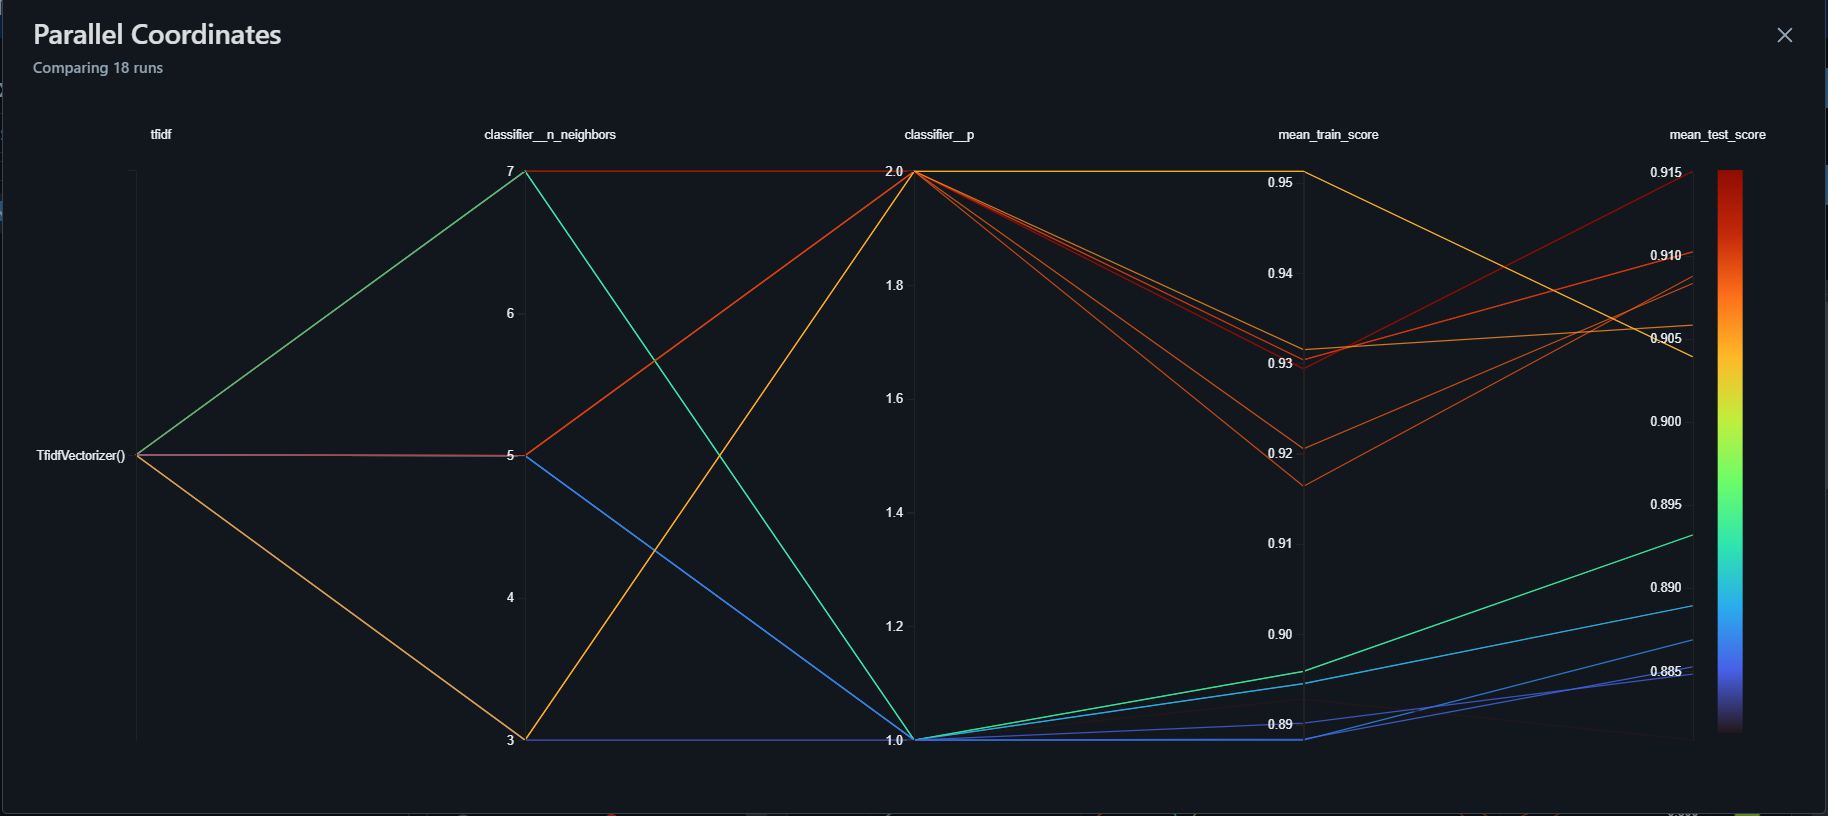

In [2]:
from IPython.display import Image
Image(filename='Screenshot (288).png')

In [47]:
pipe_2 = Pipeline(
    [
        ('tfidf', TfidfVectorizer()),
        ('classifier', SVC())
    ]
)

# Observe the Key Value Pair format
parameter_grid_2 = [
    {
        'classifier__kernel': ['rbf'],
        'classifier__C': [0.1, 0.01, 1, 100]
    },
    {
        'classifier__kernel': ['poly'],
        'classifier__degree': [2, 3, 4, 5],
        'classifier__C': [0.1, 0.01, 1, 10, 100]
    },
    {
        'classifier__kernel': ['linear'],
        'classifier__C': [0.1, 0.01, 1, 10, 100]
    }
]

clf = GridSearchCV(
    estimator=pipe_2,
    param_grid=parameter_grid_2,
    scoring='accuracy',
    cv=5,
    return_train_score=True,
    verbose=1
)

# Initialize the auto logger
# max_tuning_runs=None will make sure that all the runs are recorded
# By default top 5 runs will be recorded for each experiment

mlflow.sklearn.autolog(max_tuning_runs=None)

with mlflow.start_run() as run:
    %time clf.fit(X_train['Cleaned Review Text'], y_train)


2024/03/24 10:17:06 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.


Fitting 5 folds for each of 29 candidates, totalling 145 fits
CPU times: total: 3min 5s
Wall time: 5min 33s


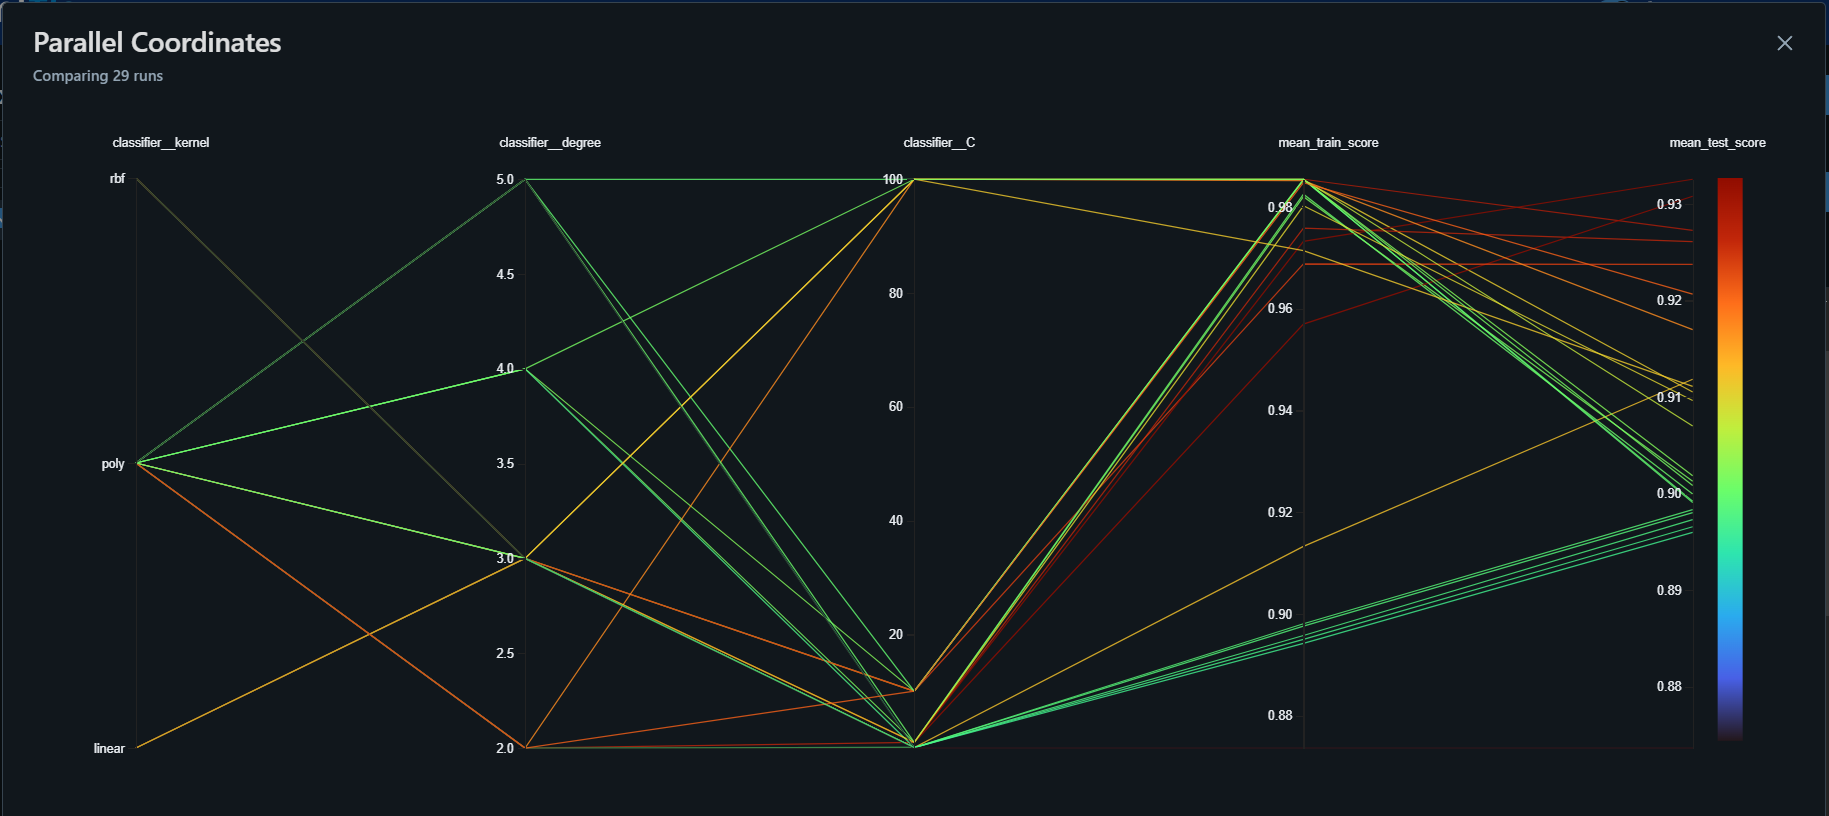

In [4]:
from IPython.display import Image
Image(filename='Screenshot (289).png')

In [48]:
pipe_lr = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('classifier', LogisticRegression())
])

param_grid_lr = {
    'classifier__C': [0.1, 1, 10],
    'classifier__penalty': ['l2', 'l1', 'elasticnet'],
    'classifier__l1_ratio': [0.4, 0.5, 0.6],
    'classifier__solver': ['liblinear', 'saga']
}

clf_lr = GridSearchCV(
    estimator=pipe_lr,
    param_grid=param_grid_lr,
    scoring='accuracy',
    cv=5,
    return_train_score=True,
    verbose=1
)

mlflow.sklearn.autolog(max_tuning_runs=None)

with mlflow.start_run() as run:
    %time clf_lr.fit(X_train['Cleaned Review Text'], y_train)


2024/03/24 10:22:40 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.


Fitting 5 folds for each of 54 candidates, totalling 270 fits
CPU times: total: 57.5 s
Wall time: 2min 8s


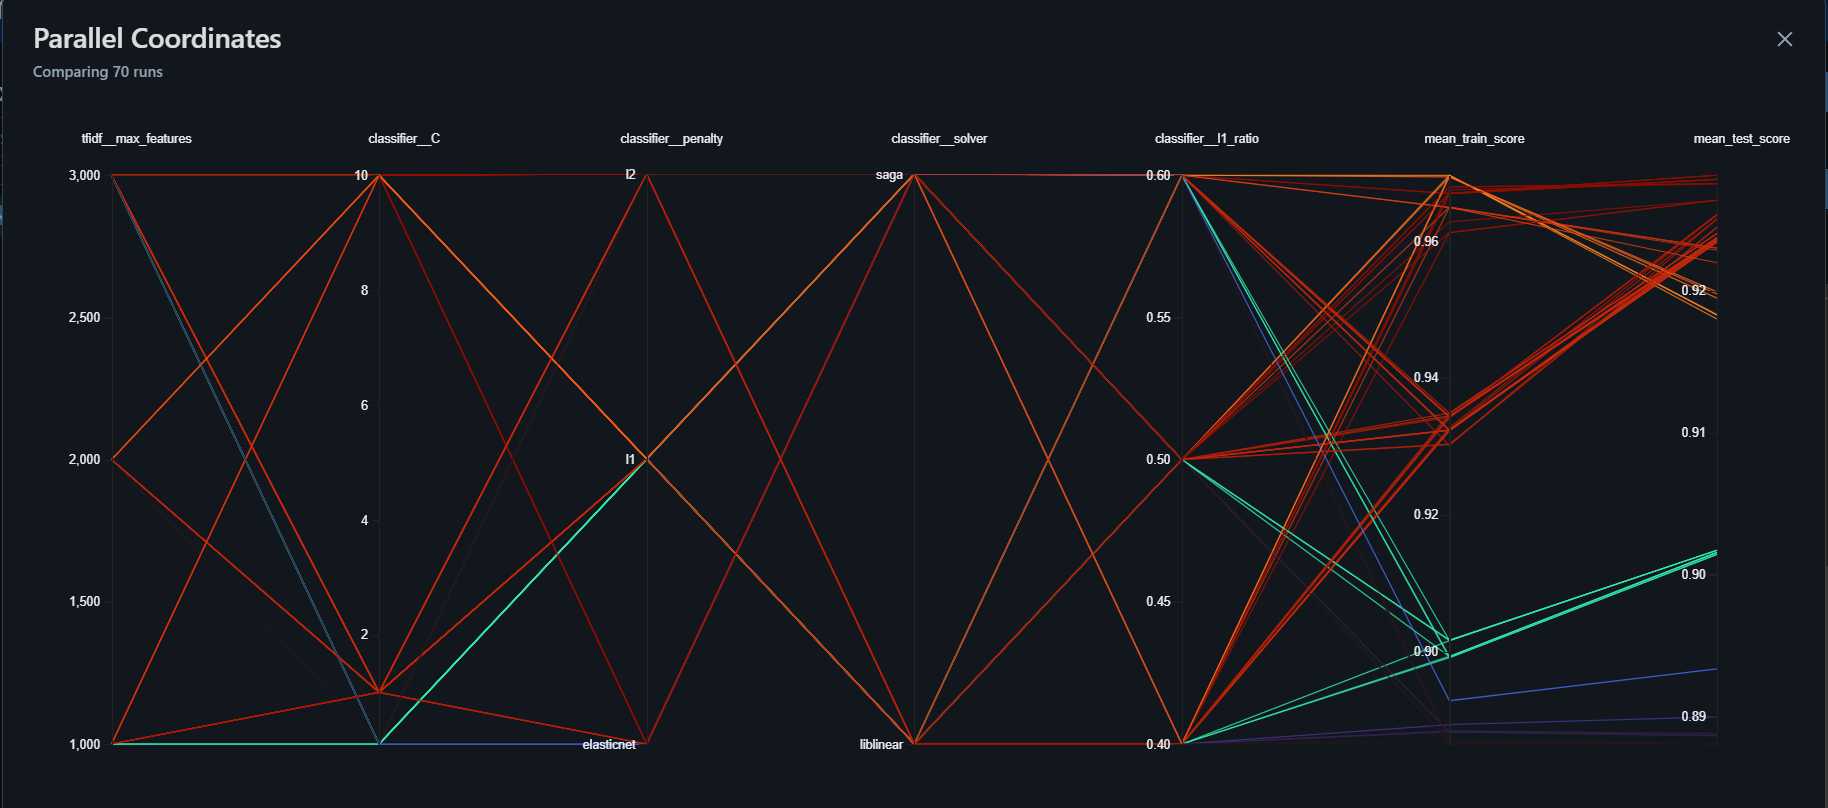

In [7]:
from IPython.display import Image
Image(filename='Screenshot (292).png')

In [49]:
pipe_dt = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('classifier', DecisionTreeClassifier())
])

param_grid_dt = {
    'classifier__max_depth': [None, 5, 10]
}

clf_dt = GridSearchCV(
    estimator=pipe_dt,
    param_grid=param_grid_dt,
    scoring='accuracy',
    cv=5,
    return_train_score=True,
    verbose=1
)

mlflow.sklearn.autolog(max_tuning_runs=None)

with mlflow.start_run() as run:
    %time clf_dt.fit(X_train['Cleaned Review Text'], y_train)


2024/03/24 10:24:49 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.


Fitting 5 folds for each of 3 candidates, totalling 15 fits
CPU times: total: 3.72 s
Wall time: 16 s


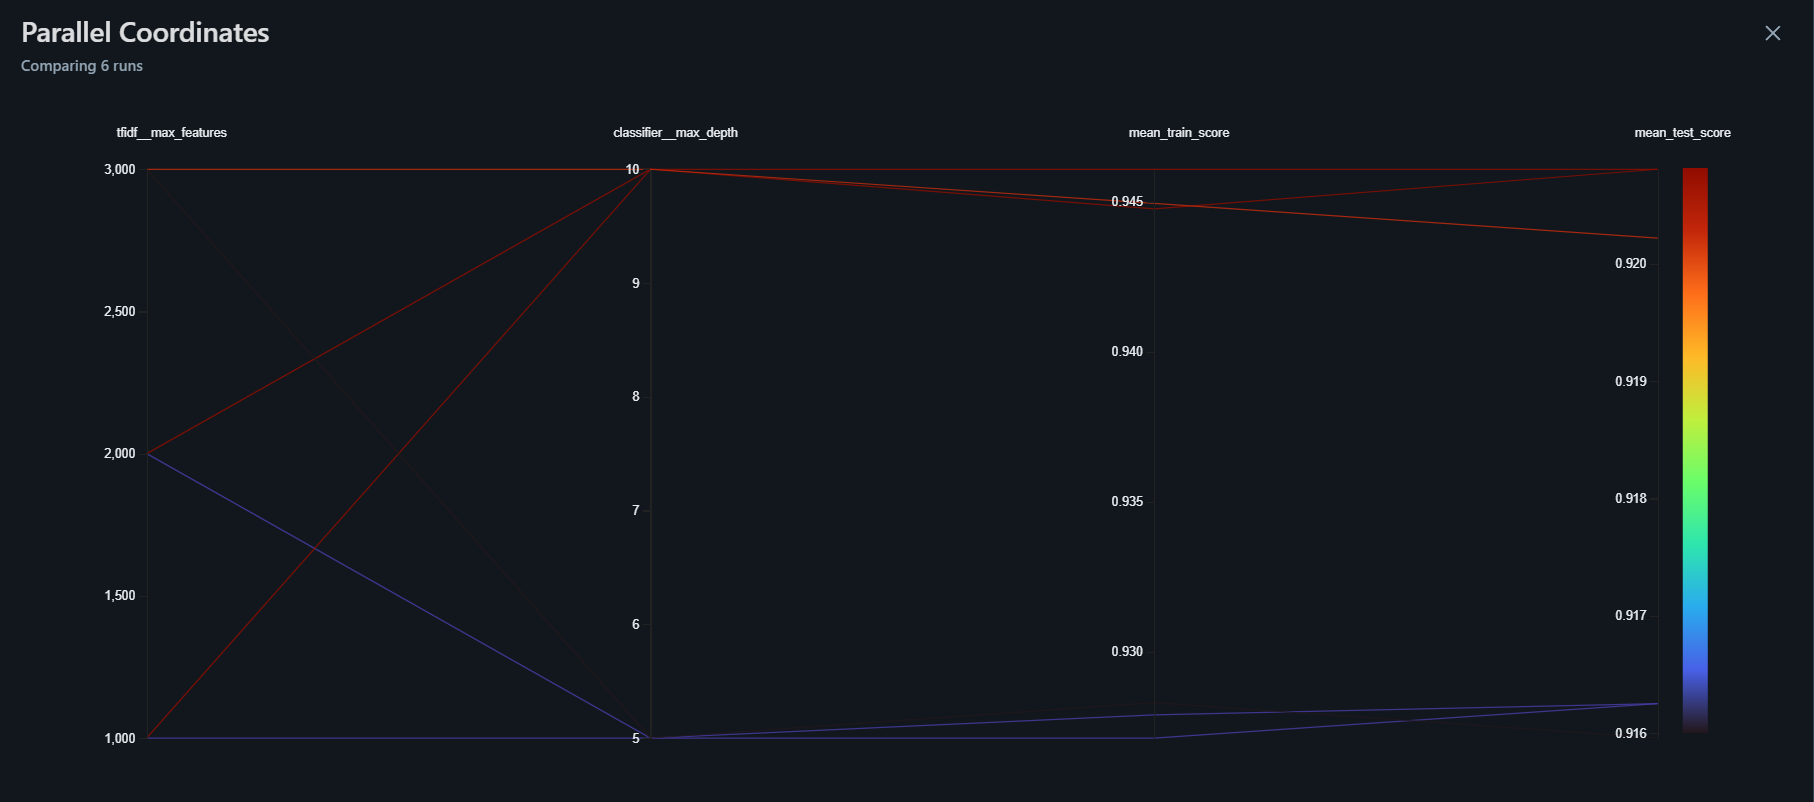

In [9]:
from IPython.display import Image
Image(filename='Screenshot (291).png')

In [50]:
pipe_rf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('classifier', RandomForestClassifier())
])

param_grid_rf = {
    'classifier__n_estimators': [50, 100, 200]
}

clf_rf = GridSearchCV(
    estimator=pipe_rf,
    param_grid=param_grid_rf,
    scoring='accuracy',
    cv=5,
    return_train_score=True,
    verbose=1
)

mlflow.sklearn.autolog(max_tuning_runs=None)

with mlflow.start_run() as run:
    %time clf_rf.fit(X_train['Cleaned Review Text'], y_train)


2024/03/24 10:25:05 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.


Fitting 5 folds for each of 3 candidates, totalling 15 fits
CPU times: total: 1min 15s
Wall time: 2min 26s


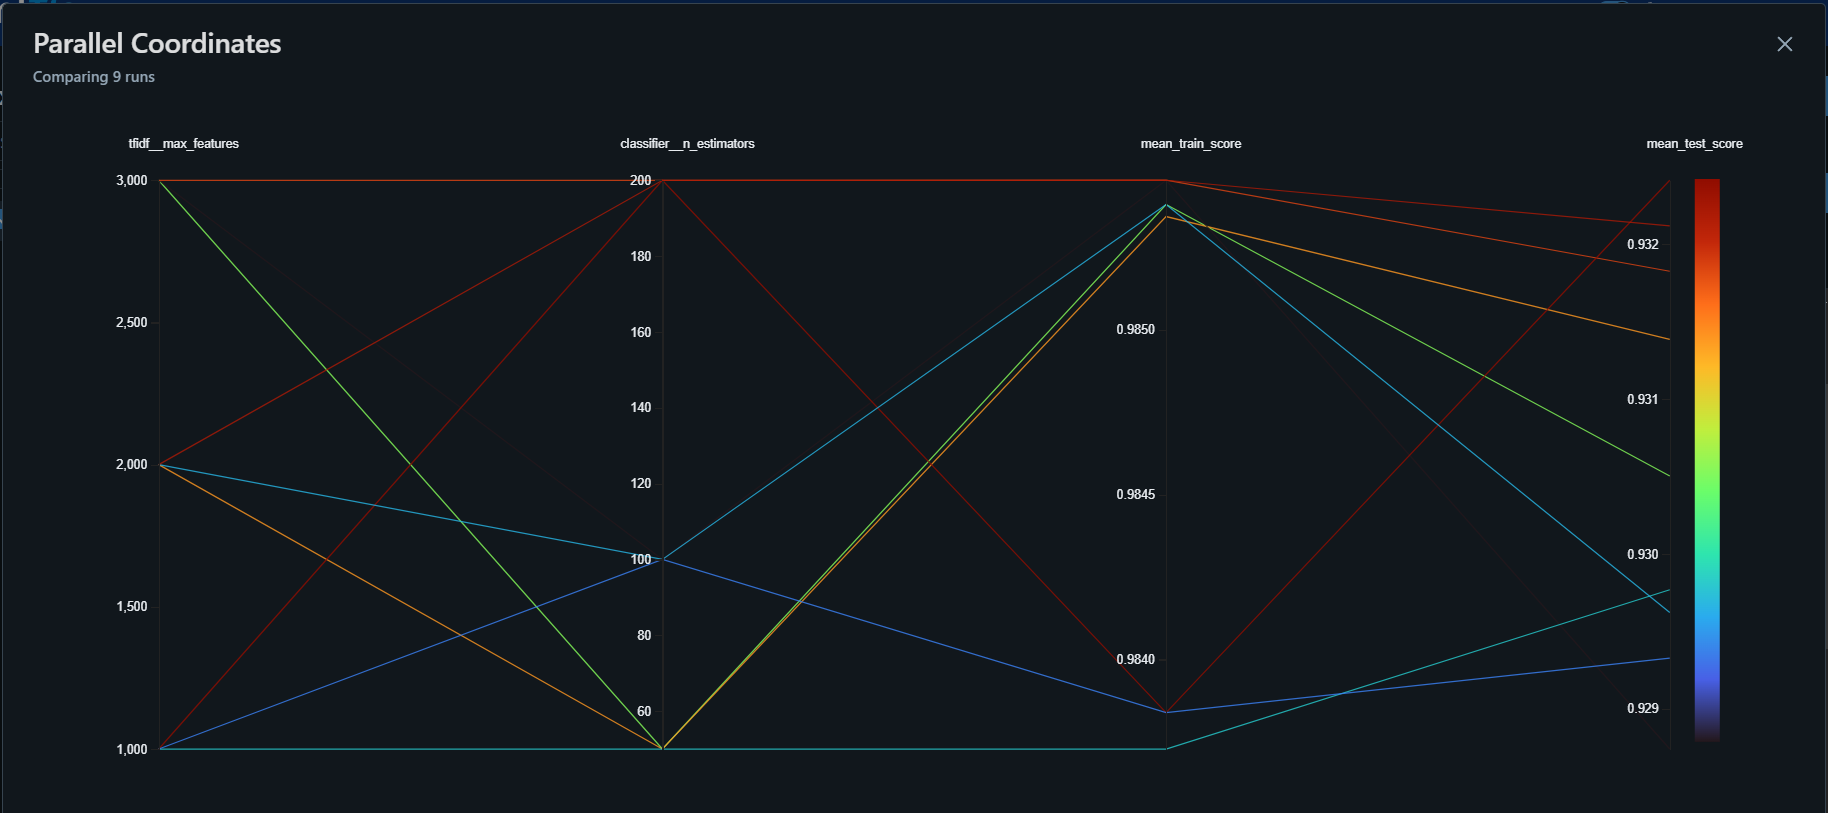

In [13]:
from IPython.display import Image
Image(filename='Screenshot (290).png')